# EE386 Digital Signal Processing Lab

## Experriment 8



In [1]:
import numpy as np
import IPython
import scipy
import math
import pandas as pd
import io
from IPython.display import Audio, display
from scipy.signal import chirp, spectrogram
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
from scipy import signal as sp
from scipy.io import wavfile
from scipy.fftpack import fft
from scipy.signal import find_peaks

%matplotlib inline
plt.style.use(['seaborn-notebook'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (15, 8),
    "axes.labelsize": 15,
    "font.size": 8})
!pip install control

import control

     |████████████████████████████████| 339 kB 23.5 MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344928 sha256=8189cd1756c8bf567fbb255a6a78dc8c8193a8712cc644cdc2a837033718f2fb
  Stored in directory: /root/.cache/pip/wheels/5b/64/54/70faad181d7baff1184541ca00c9a2efa633acd0a811831d30
Successfully built control


The propagation mechanism of an epidemic, such as the one caused by the SARS-CoV-2
virus, can be modelled, at least in its initial phase, as a process in which each infected
individual will eventually transmit the disease to an average of R0 healthy people; these
newly infected patients will, in turn, infect R0 healthy individuals each, and so on, creating a pernicious positive feedback in the system. The constant R0 is called the basic
reproduction number for a virus.



In signal processing terms, the infection mechanism is equivalent to a first-order recursive filter. Assume that each infected person spreads the virus over a single day and
then recovers and assume that an initial patient zero appears at day n = 0. The number
of newly infected people per day is described by the difference equation
$$y[n] = δ[n] + R_0y[n − 1]$$



1. What is the transfer function $H_1(z)$ of the above system? Plot the pole-zero plot of the system.

Applying z - transform on both the sides, we get

$Y[z] = 1 + R_0 Y[z]*z^{-1}$

$\implies H(z) = \frac{z}{z - R_0}$

In [2]:
# Pole zero plot
R0 = 1      # basic reproduction constant
num = [1]
deno = [1, -R0]

zero, pole, gain = sp.tf2zpk(num, deno)

In [8]:
def plot(p, z, xaxis_label=None, yaxis_label=None, row=None):  
    axs.plot(np.cos(theta), np.sin(theta), label='Unit circle')
    axs.plot(np.real(p), np.imag(p), 'gX', label='Poles')
    axs.plot(np.real(z), np.imag(z), 'ro', label='Zeroes')
    axs.legend(loc = 'upper right', fontsize = 15)
    axs.set_title(r'$Pole-Zero\ Plot\ of\ H(z)$', fontsize = 25)
    axs.set_xlabel(xaxis_label, fontsize = 25)
    axs.set_ylabel(yaxis_label, fontsize = 25)
    axs.tick_params(axis="both", labelsize = 15)
    plt.grid()
    fig.tight_layout()

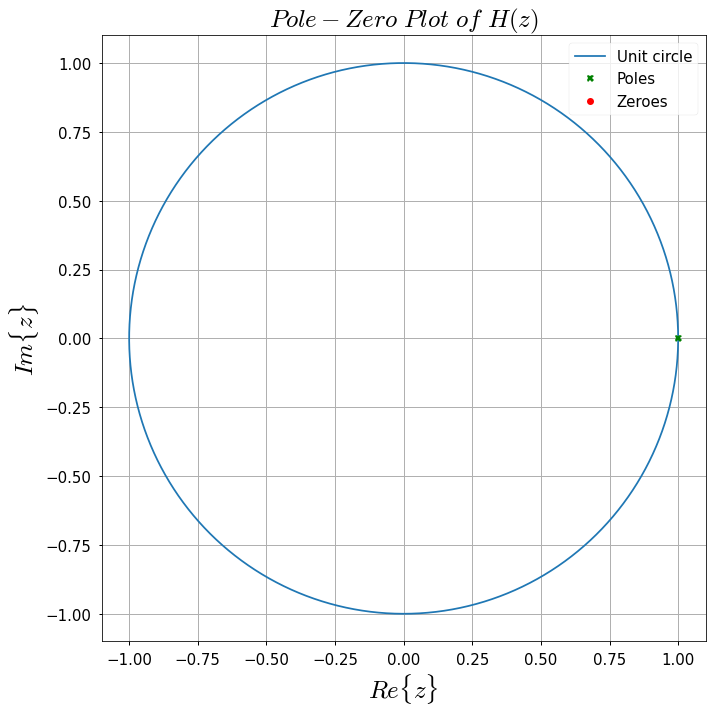

In [9]:
theta=np.arange(0, 2*np.pi, 0.01)
fig, axs = plt.subplots(figsize=(10,10))

plot(pole, zero, xaxis_label=r'$Re\{z\}$', yaxis_label=r'$Im\{z\}$', row=0)

In [18]:
def plotZero(p, z, plabel = None, zlabel = None):  
    axs.plot(np.real(p), np.imag(p), 'X', label=plabel)
    axs.plot(np.real(z), np.imag(z), 'o', label=zlabel)

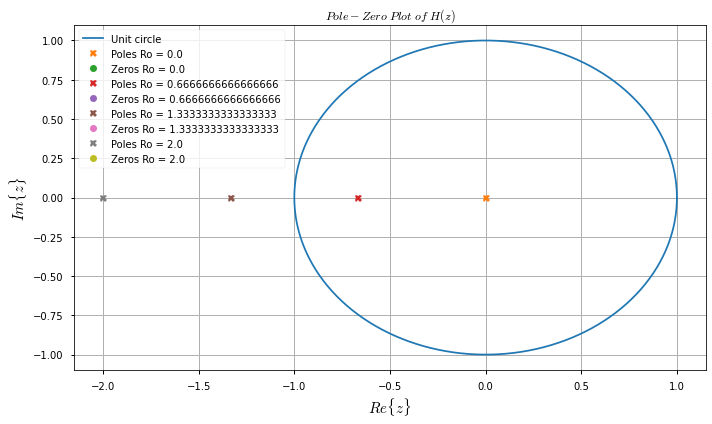

In [26]:
# varying the value of R and ploting the corresponding pole zero plot
theta=np.arange(0, 2*np.pi, 0.01)
fig, axs = plt.subplots(figsize=(10,6))
axs.plot(np.cos(theta), np.sin(theta), label='Unit circle')

R = np.linspace(0, 2, 4)
for r in R:
  num = [1]
  deno = [1, r]
  z, p, g = sp.tf2zpk(num, deno)
  plotZero(p, z, plabel = r'Poles Ro = ' + str(r), zlabel = r'Zeros Ro = ' + str(r))

axs.legend()
axs.set_title(r'$Pole-Zero\ Plot\ of\ H(z)$')
axs.set_xlabel('$Re\{z\}$')
axs.set_ylabel('$Im\{z\}$')
axs.tick_params(axis="both")
plt.grid()
fig.tight_layout()

$y[0] = \delta[0] + R_o * y[-1]$

$\implies y[0] = 1$  ($y[-1] = 0$, no-cases in the time $t_{-1}$)

Similarly, $y[1] = R_o^{1}$, and $y[2] = R_o^{2}$

$\therefore y[n] = R_o^{n}$

Given, $y[n] = 1,000,000$

$or, R_o^{n} = 1,000,000$ with $R_o = 2.5$

$\implies n = \frac{log(1000000)}{log(2.5)}$

$\implies n = 16$

Text(0, 0.5, 'Number of new infections')

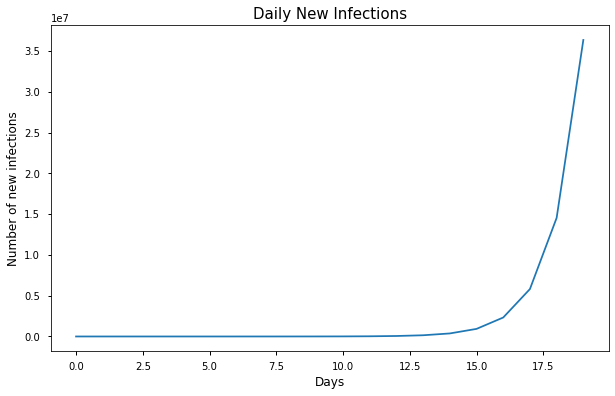

In [36]:
plt.figure(figsize=(10, 6))

n = np.arange(0, 20)
Ro = 2.5
yn = Ro ** n
plt.plot(yn)
plt.title("Daily New Infections", fontsize=15)
plt.xlabel("Days", fontsize=12)
plt.ylabel("Number of new infections", fontsize=12)

In [35]:
# Subproblem 5 part 2
# Finding the total number of infections for the first 20 days
Num = np.array([1,0])
Deno = np.array([1,-1])
y = sp.lfilter(Num, Deno , yn)
total_case = str(int((round(y[np.size(y)-1],2))))
print('total number of infections of first 20 days :'+ total_case)

total number of infections of first 20 days :60632979


## Problem 2

$H_M(z) = \frac{1}{1-Σ_{k=1}^{M}a_kz^{-k}}$

On taking the z-transorm

we get, $y(n) = δ(n) + Σ_{k=1}^{M}a_kh(n-k)$

In [74]:
ak = [0.1, 0.15, 0.25, 0.26, 0.34, 0.42, 0.25, 0.2, 0.15, 0.1, 0.1, 0.1]
N = 100
M = 12
y = np.zeros(100)

for i in range(N):
  y[i] = int(i == 0) + sum([ak[j]*float(i-j-1 >= 0)*y[i-j-1] for j in range(M)])

Total Number of infections at the end of 100 days : 2584920.1934707323


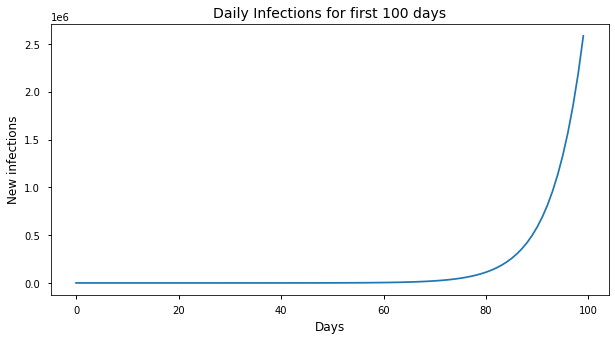

In [75]:
plt.figure(figsize=(10, 5))

plt.plot(y)
plt.title("Daily Infections for first 100 days", fontsize=14)
plt.xlabel("Days", fontsize=12)
plt.ylabel("New infections", fontsize=12)

print("Total Number of infections at the end of 100 days : {}".format(y[99]))

# Problem 3

$H_M(z;ρ) = \frac{1}{1 - \Sigma_{k=1}^{M}(1-ρ)a_kz^{-k}}$

on taking the z-transform, we get the impulse response

$y(n) = δ(n) + Σ_{k=1}^{M}a_ky(n-k)$

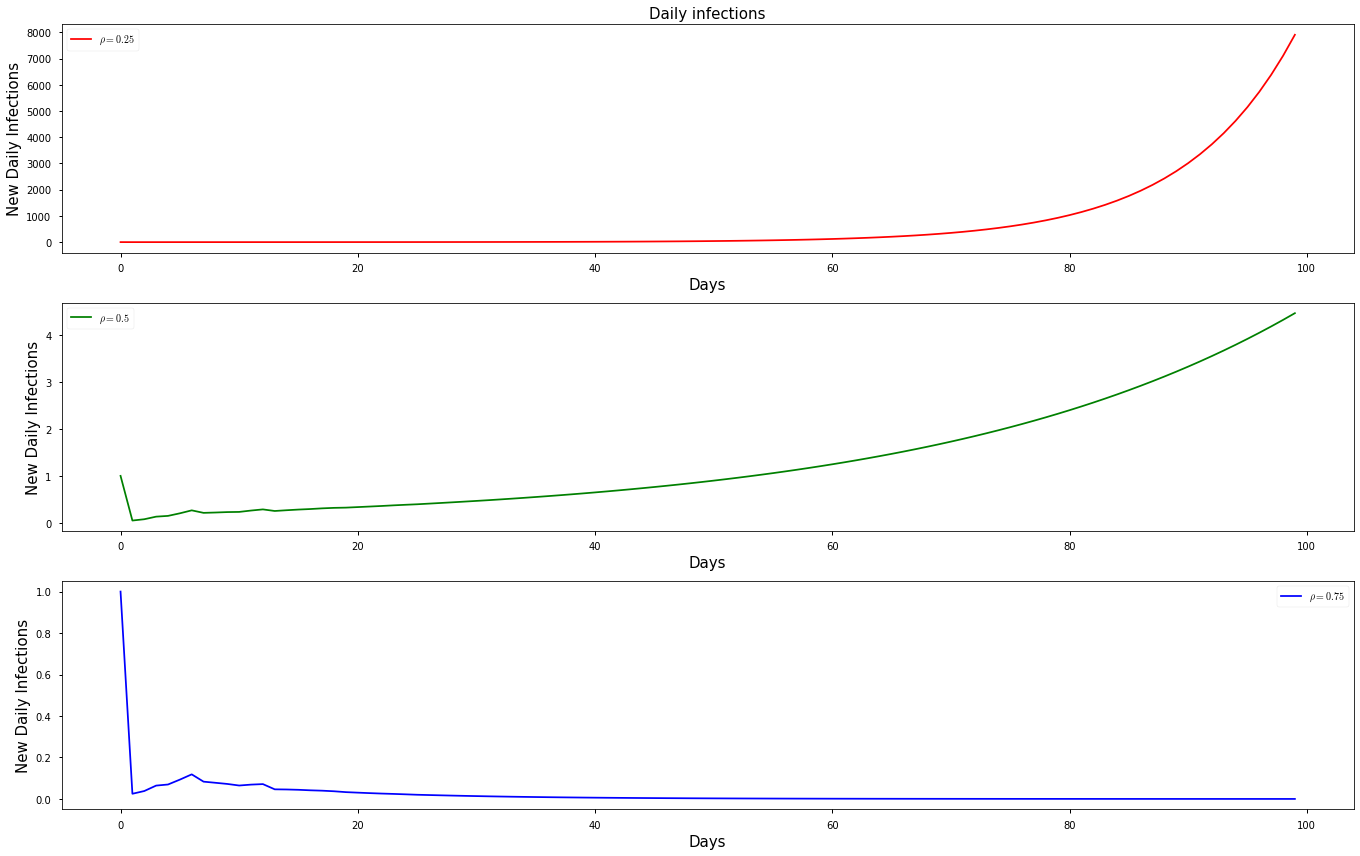

In [123]:
ak = [0.1, 0.15, 0.25, 0.26, 0.34, 0.42, 0.25, 0.2, 0.15, 0.1, 0.1, 0.1]
N = 100
M = 12
yrho1 = np.zeros(100)
yrho2 = np.zeros(100)
yrho3 = np.zeros(100)

rho1 = 0.25
rho2 = 0.5
rho3 = 0.75

for i in range(N):
  yrho1[i] = int(i == 0) + sum([ak[j] * float(i-j-1 >= 0) * (1 - rho1) * yrho1[i-j-1] for j in range(M)])
  yrho2[i] = int(i == 0) + sum([ak[j] * float(i-j-1 >= 0) * (1 - rho2) * yrho2[i-j-1] for j in range(M)])
  yrho3[i] = int(i == 0) + sum([ak[j] * float(i-j-1 >= 0) * (1 - rho3) * yrho3[i-j-1] for j in range(M)])

plt.figure(figsize=(19, 12))

plt.subplot(3, 1, 1)
plt.title("Daily infections", fontsize=15)
plt.plot(yrho1, color='red', label=r'$\rho = 0.25$')
plt.legend()
plt.ylabel("New Daily Infections")
plt.xlabel("Days")

plt.subplot(3, 1, 2)
plt.plot(yrho2, color='green', label=r'$\rho = 0.5$')
plt.legend()
plt.ylabel("New Daily Infections")
plt.xlabel("Days")

plt.subplot(3, 1, 3)
plt.plot(yrho3, color='blue', label=r'$\rho = 0.75$')
plt.ylabel("New Daily Infections")
plt.xlabel("Days")
plt.legend()

plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly i

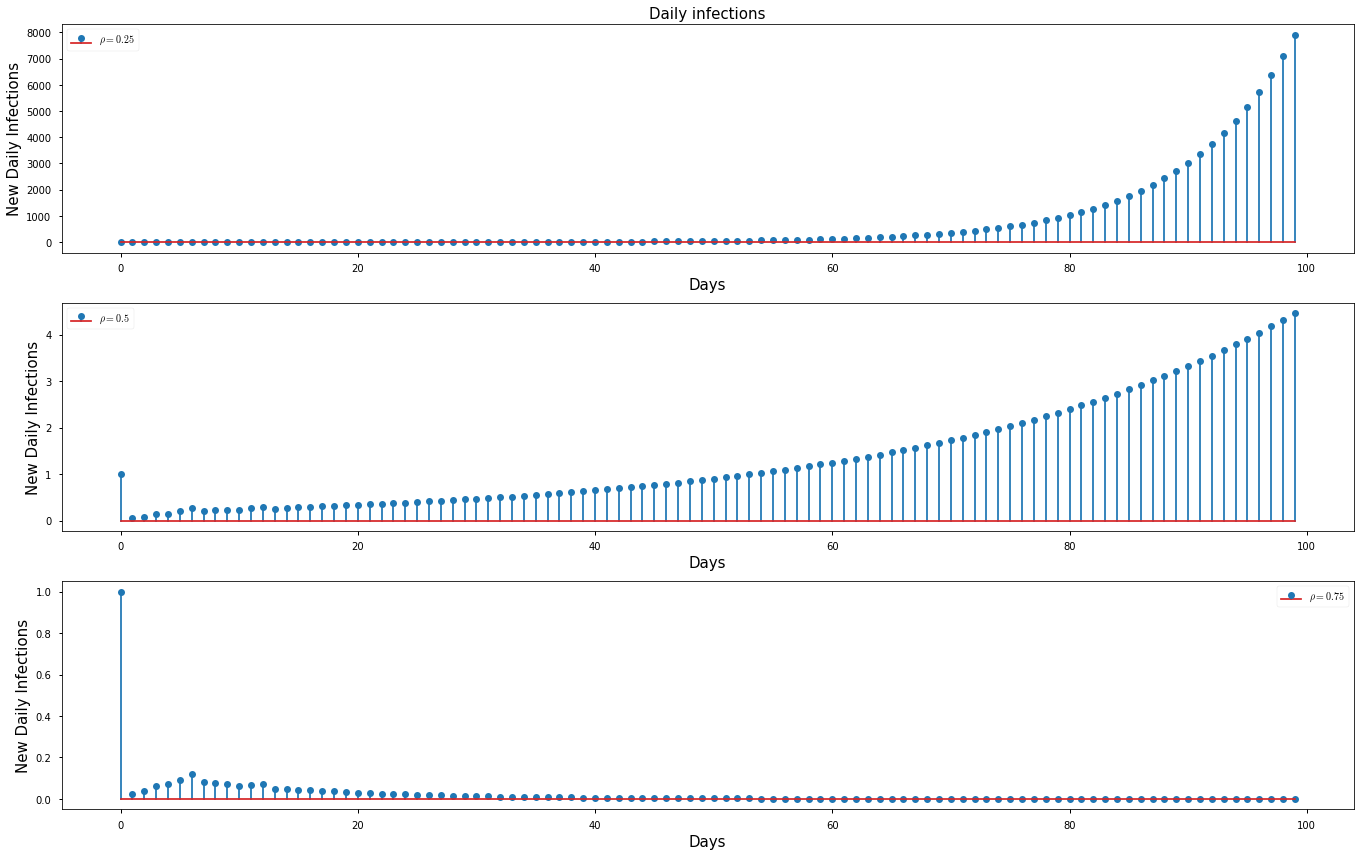

In [125]:
plt.figure(figsize=(19, 12))

plt.subplot(3, 1, 1)
plt.title("Daily infections", fontsize=15)
plt.stem(yrho1, label=r'$\rho = 0.25$')
plt.legend()
plt.ylabel("New Daily Infections")
plt.xlabel("Days")

plt.subplot(3, 1, 2)
plt.stem(yrho2, label=r'$\rho = 0.5$')
plt.legend()
plt.ylabel("New Daily Infections")
plt.xlabel("Days")

plt.subplot(3, 1, 3)
plt.stem(yrho3, label=r'$\rho = 0.75$')
plt.ylabel("New Daily Infections")
plt.xlabel("Days")
plt.legend()

plt.tight_layout()

In [97]:
N=np.array([1,0])
D=np.array([1,-1])
# Applying integrator filter
y_total1 = sp.lfilter(N, D, yrho1)
y_total2 = sp.lfilter(N, D, yrho2)
y_total3 = sp.lfilter(N, D, yrho3)

total_infections1 = y_total1[np.size(y_total1)-1]
total_infections2 = y_total2[np.size(y_total2)-1]
total_infections3 = y_total3[np.size(y_total3)-1]

print("Total number of infections found in 100 days for = 0.25: "+ str(int(np.ceil(total_infections1))))
print("Total number of infections found in 100 days for = 0.5: "+ str(int(np.ceil(total_infections2))))
print("Total number of infections found in 100 days for = 0.75: "+ str(int(np.ceil(total_infections3))))

Total number of infections found in 100 days for = 0.25: 3
Total number of infections found in 100 days for = 0.5: 134
Total number of infections found in 100 days for = 0.75: 77745


## Problem 4

In [104]:
# User-defined stem plot
def stemPlot(x, y,  xlabel=None, ylabel=None, title=None, save=None, legend=None):
 plt.stem(x, y)
 plt.xlabel(xlabel)
 plt.ylabel(ylabel)
 plt.title(title)
 if legend:
        plt.legend()
 if save:
    plt.savefig(save+'.png')
 plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


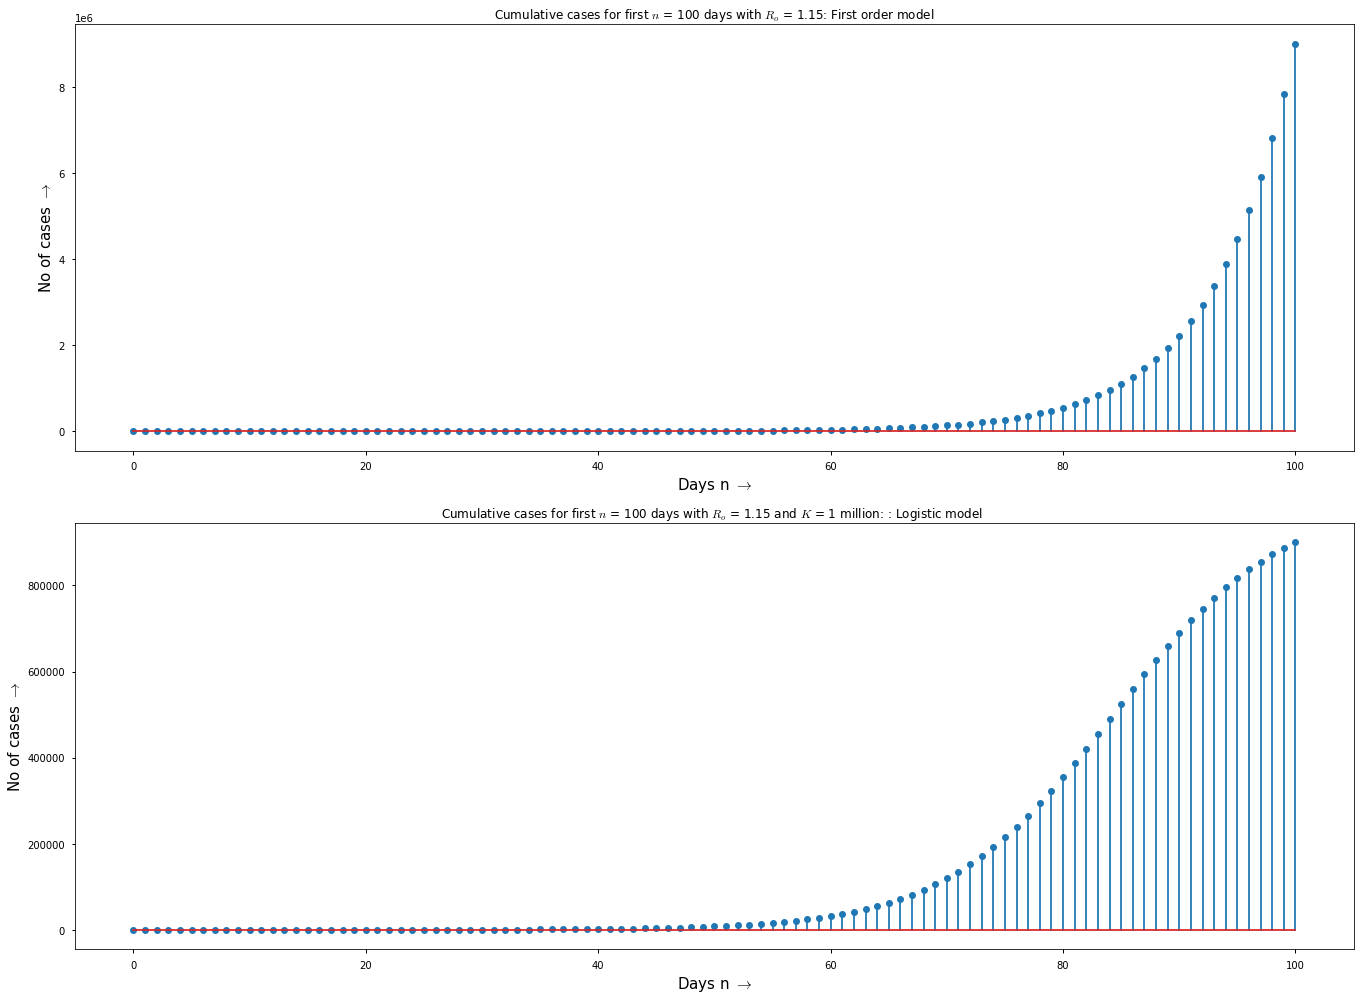

In [106]:
plt.figure(figsize=(19,14))

nL = np.arange(0,101)

# Given
K = 1e6     #population size
Ro = 1.15

yLogistic = ( K/( 1 + (K*(Ro -1) - Ro)*Ro**(-(nL+1)) ) ) - (1 / (Ro - 1))    #logistic function culmulative number

#First-order model
bfo = [1, 0]
afo = [1, -Ro]
delta = np.zeros(101)
delta[0] = 1
#Impulse reponse for first order model
yfo = sp.lfilter(bfo,afo,delta)

#Cummulative sum for first order
yfo_sum = sp.lfilter(N,D,yfo)

plt.subplot(2,1,1)
stemPlot(nL,yfo_sum,r"Days n $\rightarrow$",r"No of cases $\rightarrow$",title = r"Cumulative cases for first $n$ = 100 days with $R_o$ = 1.15: First order model" )
plt.subplot(2,1,2)
stemPlot(nL,yLogistic,r"Days n $\rightarrow$",r"No of cases $\rightarrow$",title = r"Cumulative cases for first $n$ = 100 days with $R_o$ = 1.15 and $K$ = 1 million: : Logistic model  " )

In [107]:
#For TF D1
bD1 = [1 , -1] 
aD1 = [1, 0]
yLog_D1 = sp.lfilter(bD1,aD1,yLogistic)


#For TF D2
bD2 = [1, -2, 1]
aD2 = [1, 0, 0]
yLog_D2 = sp.lfilter(bD2,aD2,yLogistic)

#point of inflection from first derivative can be found from global peak
peak = sp.find_peaks(yLog_D1, prominence = 0.8)[0]

print(r"The point of inflection obatained by first derivative: ",peak[0],"day")


#from second derivative
for i in range(len(yLog_D2)):
    if i == 0:
        continue
    elif i == len(yLog_D2)-1:
        break
    elif (yLog_D2[i-1] >= 0 and yLog_D2[i+1] <= 0) or (yLog_D2[i-1] <= 0 and yLog_D2[i+1] >= 0):
        poi = i
        break
    else:
        continue
        
print(r"The point of inflection obtained by second derivative: ",poi,"day")

The point of inflection obatained by first derivative:  85 day
The point of inflection obtained by second derivative:  85 day
